# Leaf disease part segmentation

> Indented block







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.utils import normalize
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
'''

#Resizing images, if needed
SIZE_X = 128
SIZE_Y = 128
n_classes=3 #Number of classes for segmentation

#Capture training image info as a list
train_images = []
train_masks = []
for directory_path in glob.glob("/content/drive/My Drive/leaf mask and image/new/"):
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE_Y, SIZE_X))
        train_images.append(img)

#Convert list to array for machine learning processing
train_images = np.array(train_images)

#Capture mask/label info as a list
train_masks = []
for directory_path in glob.glob("/content/drive/My Drive/leaf mask and image/mask/"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
        mask = cv2.imread(mask_path, 0)
        mask = cv2.resize(mask, (SIZE_Y, SIZE_X), interpolation = cv2.INTER_NEAREST)  #Otherwise ground truth changes due to interpolation
        train_masks.append(mask)

#Convert list to array for machine learning processing
train_masks = np.array(train_masks)
'''

'\n\n#Resizing images, if needed\nSIZE_X = 128 \nSIZE_Y = 128\nn_classes=3 #Number of classes for segmentation\n\n#Capture training image info as a list\ntrain_images = []\ntrain_masks = []\nfor directory_path in glob.glob("/content/drive/My Drive/leaf mask and image/new/"):\n    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):\n        img = cv2.imread(img_path, cv2.IMREAD_COLOR)        \n        img = cv2.resize(img, (SIZE_Y, SIZE_X))\n        train_images.append(img)\n      \n#Convert list to array for machine learning processing        \ntrain_images = np.array(train_images)\n\n#Capture mask/label info as a list\ntrain_masks = [] \nfor directory_path in glob.glob("/content/drive/My Drive/leaf mask and image/mask/"):\n    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):\n        mask = cv2.imread(mask_path, 0)       \n        mask = cv2.resize(mask, (SIZE_Y, SIZE_X), interpolation = cv2.INTER_NEAREST)  #Otherwise ground truth changes due to interpo

In [ ]:
#Resizing images, if needed
SIZE_X = 224
SIZE_Y = 448
n_classes=3 #Number of classes for segmentation

#Capture training image info as a list
train_images = []
for directory_path in glob.glob("/content/drive/My Drive/leaf mask and image/new1/"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE_Y, SIZE_X))
        img1 = img[:,0:224]
        train_images.append(img1)
train_images = np.array(train_images)

In [ ]:
#Resizing images, if needed
SIZE_X = 224
SIZE_Y = 448
n_classes=3 #Number of classes for segmentation

#Capture training image info as a list
train_masks = []
for directory_path in glob.glob("/content/drive/My Drive/leaf mask and image/new1/"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = img[:,:,0]
        img = cv2.resize(img, (SIZE_Y, SIZE_X), interpolation = cv2.INTER_NEAREST)
        img2 = img[:,224:448]
        train_masks.append(img2)
#train_images = np.array(train_images)
train_masks = np.array(train_masks)

In [ ]:
np.unique(img2)

array([  0, 150, 255], dtype=uint8)

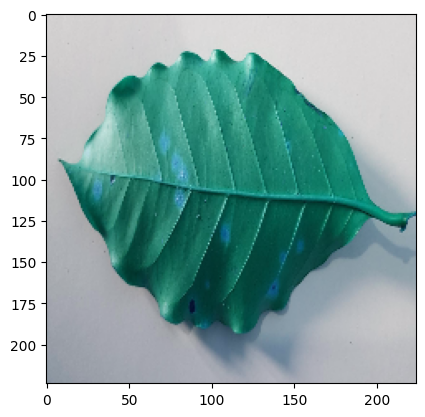

In [ ]:
image_tuple = train_images[39]
plt.imshow(image_tuple)
plt.show()

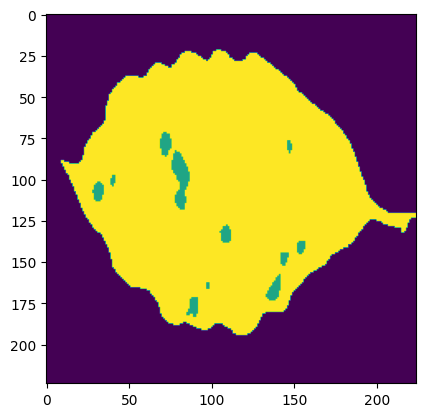

In [ ]:
image_tuple = train_masks[39]
plt.imshow(image_tuple)
plt.show()

In [ ]:
print(np.shape(train_images))
print(np.shape(train_masks))

(224, 224, 224, 3)
(224, 224, 224)


In [ ]:
#Encode labels... but multi dim array so need to flatten, encode and reshape
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
n, h, w = np.shape(train_masks)
train_masks_reshaped = train_masks.reshape(-1,1)

In [ ]:
train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape(n, h, w)

In [ ]:
np.unique(train_masks_encoded_original_shape)

array([0, 1, 2])

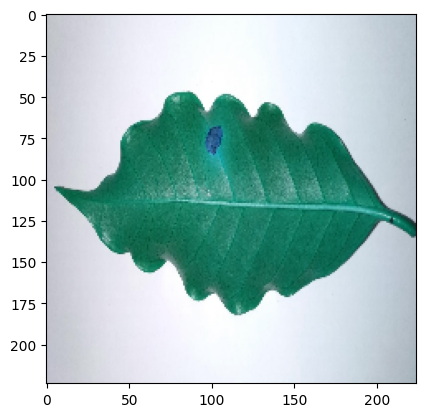

In [ ]:
plt.imshow(train_images[40, :,:])

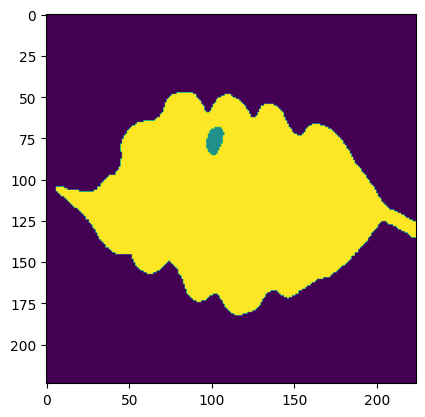

In [ ]:
plt.imshow(train_masks_encoded_original_shape[40, :,:])

In [ ]:
#train_images = np.expand_dims(train_images, axis=3)
train_images = normalize(train_images, axis=1)

train_masks_input = np.expand_dims(train_masks_encoded_original_shape, axis=3)

In [ ]:
np.shape(train_masks_input)

(224, 224, 224, 1)

In [ ]:
#Create a subset of data for quick testing
#Picking 10% for testing and remaining for training
from sklearn.model_selection import train_test_split
X1, X_test, y1, y_test = train_test_split(train_images, train_masks_input, test_size = 0.10, random_state = 0)

#Further split training data t a smaller subset for quick testing of models
X_train, X_do_not_use, y_train, y_do_not_use = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

print("Class values in the dataset are ... ", np.unique(y_train))  # 0 is the background/few unlabeled

Class values in the dataset are ...  [0 1 2]


In [ ]:
from keras.utils import to_categorical
train_masks_cat = to_categorical(y_train, num_classes=n_classes)
y_train_cat = train_masks_cat.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], n_classes))
test_masks_cat = to_categorical(y_test, num_classes=n_classes)
y_test_cat = test_masks_cat.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], n_classes))

In [ ]:
IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda

################################################################
def multi_unet_model(n_classes=4, IMG_HEIGHT=256, IMG_WIDTH=256, IMG_CHANNELS=1):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])

    #NOTE: Compile the model in the main program to make it easy to test with various loss functions
    #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    #model.summary()

    return model

In [ ]:
def get_model():
    return multi_unet_model(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_HEIGHT, IMG_CHANNELS=3)

In [ ]:
import tensorflow as tf

def tversky_loss(y_true, y_pred, alpha=0.2, beta=0.8, smooth=1e-5):
    """
    Tversky loss for multiclass segmentation.

    Args:
        y_true: Ground truth segmentation.
        y_pred: Predicted segmentation.
        alpha: Weight of false positives.
        beta: Weight of false negatives.
        smooth: Smoothing parameter to avoid division by zero.

    Returns:
        Tversky loss value.
    """
    num_classes = y_pred.shape[-1]
    t_loss = 0
    for i in range(num_classes):
        y_true_i = y_true[:, :, :, i]
        y_pred_i = y_pred[:, :, :, i]
        TP = tf.reduce_sum(y_true_i * y_pred_i)
        FP = tf.reduce_sum((1 - y_true_i) * y_pred_i)
        FN = tf.reduce_sum(y_true_i * (1 - y_pred_i))
        t_loss += (TP + smooth) / (TP + alpha * FP + beta * FN + smooth)
    return 1 - t_loss / num_classes


In [ ]:
model = get_model()
from keras.metrics import MeanIoU


model.compile(optimizer='adam', loss=tversky_loss, metrics=['accuracy','MeanIoU'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[MeanIoU(num_classes=3)])

model.summary()


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_133 (Conv2D)            (None, 224, 224, 16  448         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_63 (Dropout)           (None, 224, 224, 16  0           ['conv2d_133[0][0]']             
                                )                                                           

In [ ]:
history = model.fit(X_train, y_train_cat,
                    batch_size = 16,
                    verbose=1,
                    epochs=50,
                    validation_data=(X_test, y_test_cat),
                    #class_weight=class_weights,
                    shuffle=False)

Epoch 1/50
10/10 [==============================] - 10s 202ms/step - loss: 0.6660 - accuracy: 0.6708 - val_loss: 0.5681 - val_accuracy: 0.6754
Epoch 2/50
10/10 [==============================] - 1s 147ms/step - loss: 0.5227 - accuracy: 0.7732 - val_loss: 0.4862 - val_accuracy: 0.9671
Epoch 3/50
10/10 [==============================] - 1s 151ms/step - loss: 0.3804 - accuracy: 0.9520 - val_loss: 0.3691 - val_accuracy: 0.9558
Epoch 4/50
 3/10 [========>.....................] - ETA: 0s - loss: 0.3591 - accuracy: 0.9556

In [ ]:
#model.save('test.hdf5')
#model.save('sandstone_50_epochs_catXentropy_acc_with_weights.hdf5')
############################################################
#Evaluate the model
	# evaluate model
_, acc = model.evaluate(X_test, y_test_cat)
print("Accuracy is = ", (acc * 100.0), "%")

1/1 [==============================] - 0s 96ms/step - loss: 0.3464 - accuracy: 0.9804
Accuracy is =  98.03977012634277 %


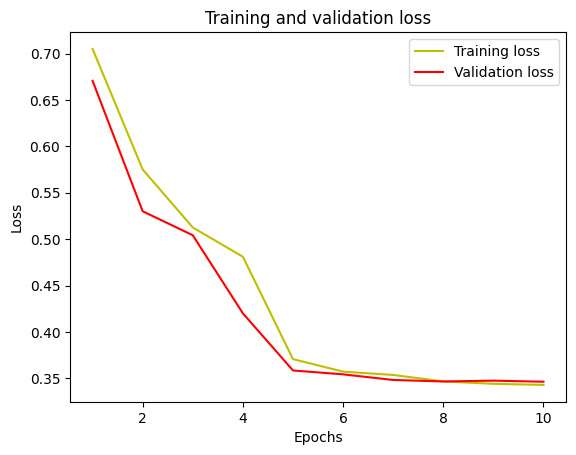

In [ ]:
###
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

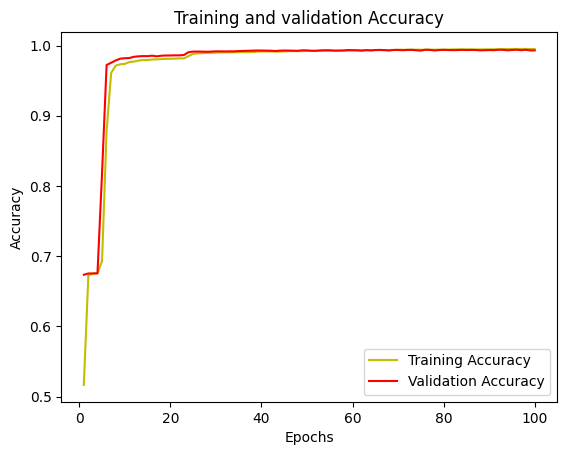

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)

1/1 [==============================] - 0s 237ms/step


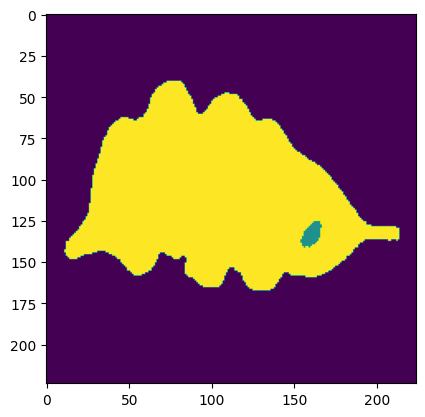

In [ ]:
plt.imshow(y_test[12, :,:])

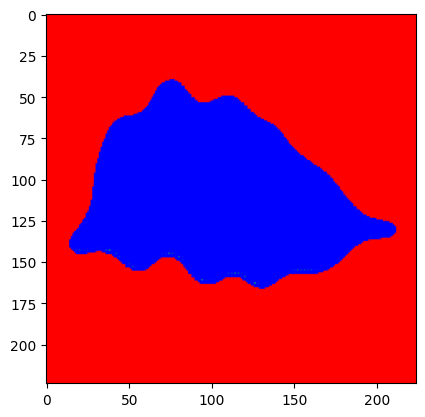

In [ ]:
plt.imshow(y_pred[12, :,:])

In [ ]:
from keras.metrics import MeanIoU
n_classes = 3
IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(y_test[:,:,:,0], y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.64121366


In [ ]:
#To calculate I0U for each class...
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)

[[7.75396e+05 2.00000e+00 4.01400e+03]
 [1.80000e+02 0.00000e+00 9.11700e+03]
 [9.26800e+03 4.10000e+01 3.56030e+05]]


In [ ]:
np.shape(y_test)

(23, 224, 224, 1)

In [ ]:
class1_IoU = values[0,0]/(values[0,0] + values[0,1] + values[0,2] + values[1,0]+ values[2,0])
class2_IoU = values[1,1]/(values[1,1] + values[1,0] + values[1,2] + values[0,1]+ values[2,1])
class3_IoU = values[2,2]/(values[2,2] + values[2,0] + values[2,1] + values[0,2]+ values[1,2])


print("IoU for class1 is: ", class1_IoU)
print("IoU for class2 is: ", class2_IoU)
print("IoU for class3 is: ", class3_IoU)

IoU for class1 is:  0.9829323
IoU for class2 is:  0.0
IoU for class3 is:  0.94070864


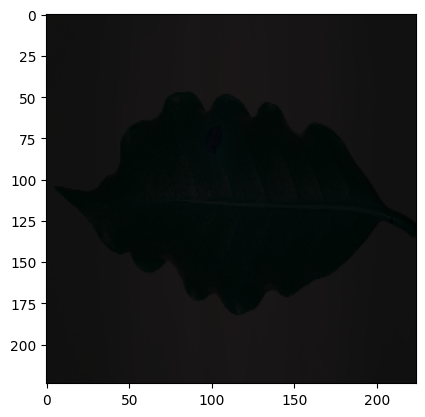

In [ ]:
plt.imshow(train_images[40, :,:,:])

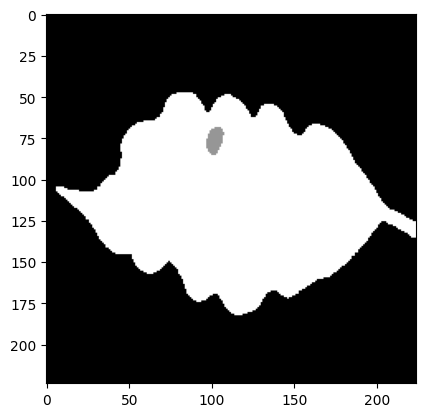

In [ ]:
plt.imshow(train_masks[40], cmap='gray')

In [ ]:
import random
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]

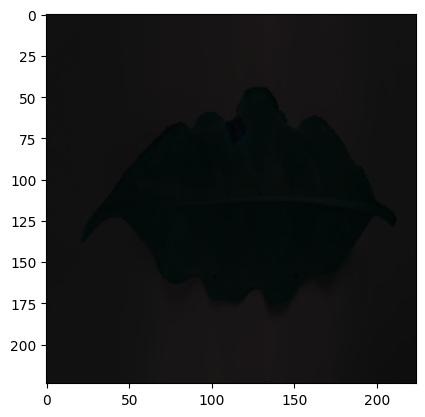

In [ ]:
plt.imshow(test_img)

In [ ]:
np.shape(test_img)

(224, 224, 3)

In [ ]:
prediction = model.predict(X_test)

1/1 [==============================] - 0s 28ms/step


In [ ]:
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]

InvalidArgumentError: ignored

In [ ]:
np.shape(test_img_norm)

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='jet')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img, cmap='jet')
plt.show()

In [ ]:
#####################################################################

#Predict on large image

#Apply a trained model on large image

from patchify import patchify, unpatchify

large_image = cv2.imread('large_images/large_image.tif', 0)
#This will split the image into small images of shape [3,3]
patches = patchify(large_image, (128, 128), step=128)  #Step=256 for 256 patches means no overlap

predicted_patches = []
for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        print(i,j)

        single_patch = patches[i,j,:,:]
        single_patch_norm = np.expand_dims(normalize(np.array(single_patch), axis=1),2)
        single_patch_input=np.expand_dims(single_patch_norm, 0)
        single_patch_prediction = (model.predict(single_patch_input))
        single_patch_predicted_img=np.argmax(single_patch_prediction, axis=3)[0,:,:]

        predicted_patches.append(single_patch_predicted_img)

predicted_patches = np.array(predicted_patches)

predicted_patches_reshaped = np.reshape(predicted_patches, (patches.shape[0], patches.shape[1], 128,128) )

reconstructed_image = unpatchify(predicted_patches_reshaped, large_image.shape)
plt.imshow(reconstructed_image, cmap='gray')
#plt.imsave('data/results/segm.jpg', reconstructed_image, cmap='gray')

plt.hist(reconstructed_image.flatten())  #Threshold everything above 0

# final_prediction = (reconstructed_image > 0.01).astype(np.uint8)
# plt.imshow(final_prediction)

plt.figure(figsize=(8, 8))
plt.subplot(221)
plt.title('Large Image')
plt.imshow(large_image, cmap='gray')
plt.subplot(222)
plt.title('Prediction of large Image')
plt.imshow(reconstructed_image, cmap='jet')
plt.show()